## Acrtivity by simple linear regression for LCC rounds 1 and 2 as done by Tim
Tim did a simple linear regression and then converted with dilution factor and volume to U/ml. He calculated the confidence interval from the four technical replicates per round

In [1]:
from matplotlib import pyplot
import numpy
import pandas

In [2]:
activity_df1 = pandas.read_excel("Activity_per_ml_round1.xlsx", index_col=0)
activity_df2 = pandas.read_excel("Activity_per_ml_round2.xlsx", index_col=0)
activity_df1["round"]=1
activity_df2["round"]=2
df = pandas.concat([activity_df1, activity_df2])
df = df[df.Strain.isin(["LipA", "LipB"])]
df

,Strain,Cutinase activity [U/mL],Standard deviation,CI,round
7,LipA,0.530644,0.034425,0.071078,1
8,LipB,0.578399,0.012697,0.026216,1
0,LipA,0.818473,0.076429,0.017970,2
1,LipB,0.767321,0.058405,0.013732,2


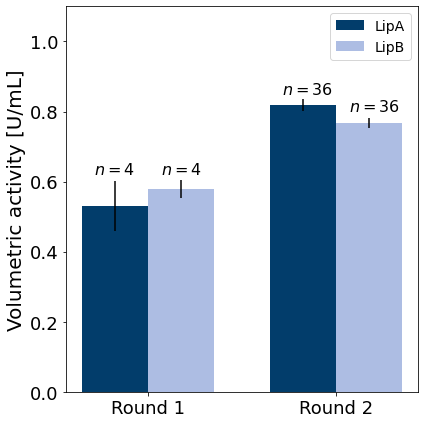

In [3]:
labels = ["Round 1","Round 2"]

x = numpy.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = pyplot.subplots(figsize=(6,6))
ax.bar(
    x - 0.5*width, df[df["Strain"]=="LipA"]["Cutinase activity [U/mL]"], 
    width, label='LipA', 
    yerr=df[df["Strain"]=="LipA"]["CI"], color="#023D6B"
)
ax.bar(
    x + 0.5*width, df[df["Strain"]=="LipB"]["Cutinase activity [U/mL]"], 
    width, label='LipB', 
    yerr=df[df["Strain"]=="LipB"]["CI"], color="#ADBDE3"
)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Volumetric activity [U/mL]', size=20)
ax.set_xticks(x, labels, size=18)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1], labels=[0.0,0.2,0.4,0.6,0.8,1.0], size=18)
ax.legend(fontsize=14)

ax.annotate(xy=(-0.285,0.62), text=r"$n = 4$", size=16)
ax.annotate(xy=(0.715,0.85), text=r"$n = 36$", size=16)
ax.annotate(xy=(0.07,0.62), text=r"$n = 4$", size=16)
ax.annotate(xy=(1.07,0.8), text=r"$n = 36$", size=16)

ax.set_ylim(0, 1.1)
fig.tight_layout()
#pyplot.bar(x=df.Strain, height=df["Cutinase activity [U/mL]"], yerr=df.CI, color="#023D6B")
pyplot.savefig("Activity_per_ml_round-based.png", dpi=400)